In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from functools import reduce
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import re
import numpy as np
df = pd.read_csv('Preprocessed.csv')

In [15]:
df.head()

,User,Date Created,Followers count,Number of Likes,Tweet,Location,Verified,Retweeted,Retweet count,hashtag,Tweet_tokens,Sentiment,Influence
0,peter,2023-02-06,221,13817,cbknews121 breaking news connected share cbkne...,NaN,0,0,274,"['KlausSchwab', 'HunterBiden', 'Ukraine']","['cbknews', '121', 'breaking', 'news', 'connec...",0,15081
1,Rich is in the ICU,2023-02-06,1783,73346,leopard,Unceded Algonquin Territory,0,0,96,"['Ukraine', 'UkraineRussiaWar', 'UkraineWar', ...",['leopard'],1,77200
2,Cїndy,2023-02-06,683,312127,sometimes people warm clothes cause 5 heat mad...,Все – Україна,0,0,15,[],"['sometimes', 'people', 'warm', 'clothes', 'ca...",1,313538
3,Taras Hatalyak,2023-02-06,125,233,mil delta,Ukraine,0,0,25,[],"['mil', 'delta']",0,558
4,忍者猫,2023-02-06,724,1322,11,NaN,0,0,11,"['ウクライナ', 'Ukraine']",['11'],0,2803


In [16]:
df.tail()

,User,Date Created,Followers count,Number of Likes,Tweet,Location,Verified,Retweeted,Retweet count,hashtag,Tweet_tokens,Sentiment,Influence
19995,Дмитрий Момот,2023-02-06,66,56534,pro promote next thing make th,NaN,0,0,18,[],"['pro', 'promote', 'next', 'thing', 'make', 'th']",1,56720
19996,Tras el valle de Aranaz,2023-02-06,128,8291,jjaranaz94 con el aybhb3kqhp covid19 covid 19 ...,Lee aquí 👇🏼 el último TEVDA,0,0,5,"['COVID19', 'Covid_19', 'COVIDー19', 'Covid', '...","['jjaranaz', '94', 'con', 'el', 'aybhb', '3kqh...",1,8562
19997,Tras el valle de Aranaz,2023-02-06,128,8291,n90i1em2qa covid19 covid 19 covid 19 covid,Lee aquí 👇🏼 el último TEVDA,0,0,23,"['Orgullo', 'docente', 'COVID19', 'Covid_19', ...","['n90i1em2qa', 'covid', '19', 'covid', '19', '...",1,8616
19998,Tras el valle de Aranaz,2023-02-06,128,8291,ser je52x9drmo covid19 covid 19 covid 19 covid,Lee aquí 👇🏼 el último TEVDA,0,0,40,"['COVID19', 'Covid_19', 'COVIDー19', 'Contagios...","['ser', 'je52x9drmo', 'covid', '19', 'covid', ...",0,8667
19999,heattedabora,2023-02-06,1,2,complete 1st mission war russia hz4sa0xusa,France,0,0,0,"['war', 'UkraineRussianWar', 'Ukraine', 'russia']","['complete', '1st', 'mission', 'war', 'russia'...",1,4


In [17]:
df.describe()

,Followers count,Number of Likes,Verified,Retweeted,Retweet count,Sentiment,Influence
count,20000.000000,20000.00000,20000.000000,20000.0,20000.000000,20000.000000,2.000000e+04
mean,4716.987100,60669.36430,0.014950,0.0,82.740450,0.535350,7.035163e+04
std,33793.136241,127164.45564,0.121356,0.0,223.882962,0.498761,1.535025e+05
min,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,4.000000e+00
25%,83.000000,1862.00000,0.000000,0.0,0.000000,0.000000,3.426000e+03
50%,270.000000,11540.00000,0.000000,0.0,5.000000,1.000000,1.361400e+04
75%,1337.000000,58601.00000,0.000000,0.0,35.000000,1.000000,6.401600e+04
max,448132.000000,928272.00000,1.000000,0.0,2557.000000,1.000000,1.292083e+06


In [18]:
print('Shape of Dataframe -> {}' .format(df.shape))

Shape of Dataframe -> (20000, 13)


In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User             20000 non-null  object
 1   Date Created     20000 non-null  object
 2   Followers count  20000 non-null  int64 
 3   Number of Likes  20000 non-null  int64 
 4   Tweet            19659 non-null  object
 5   Location         11922 non-null  object
 6   Verified         20000 non-null  int64 
 7   Retweeted        20000 non-null  int64 
 8   Retweet count    20000 non-null  int64 
 9   hashtag          20000 non-null  object
 10  Tweet_tokens     20000 non-null  object
 11  Sentiment        20000 non-null  int64 
 12  Influence        20000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 2.0+ MB


In [20]:
def return_missing_values(data_frame):
    missing_values = data_frame.isnull().sum()/len(data_frame)
    missing_values = missing_values[missing_values>0]
    missing_values.sort_values(inplace=True)
    return missing_values

def plot_missing_values(data_frame):
    missing_values = return_missing_values(data_frame)
    missing_values = missing_values.to_frame()
    missing_values.columns = ['count']
    missing_values.index.names = ['Name']
    missing_values['Name'] = missing_values.index
    sns.set(style='darkgrid')
    sns.barplot(x='Name', y='count', data=missing_values)
    plt.xticks(rotation=90)
    plt.show()

In [21]:
return_missing_values(df)

Tweet       0.01705
Location    0.40390
dtype: float64

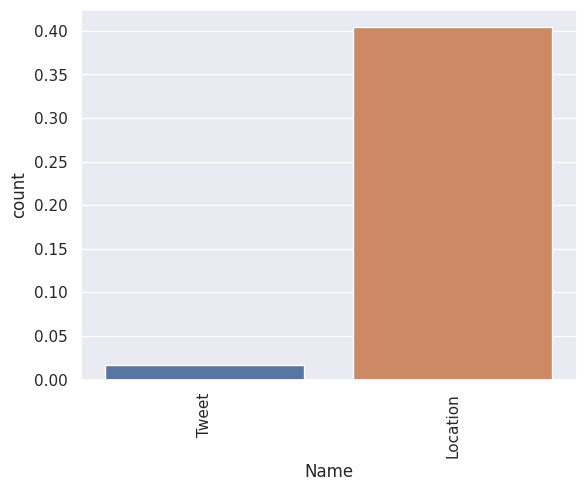

In [22]:
plot_missing_values(df)

<Axes: >

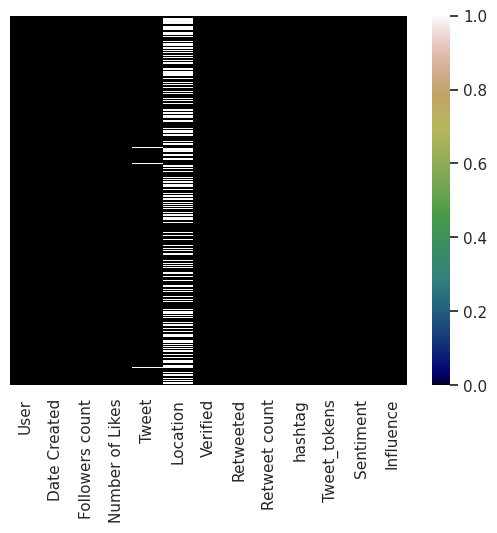

In [23]:
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='gist_earth')

In [24]:
def return_unique_values(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe['Features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe['Uniques'] = uniques
    return unique_dataframe

In [25]:
unidf = return_unique_values(df)
print(unidf)

           Features  Uniques
0              User      303
1      Date Created        1
2   Followers count      271
3   Number of Likes      608
4             Tweet      272
5          Location      135
6          Verified        2
7         Retweeted        1
8     Retweet count      114
9           hashtag      184
10     Tweet_tokens      273
11        Sentiment        2
12        Influence      771


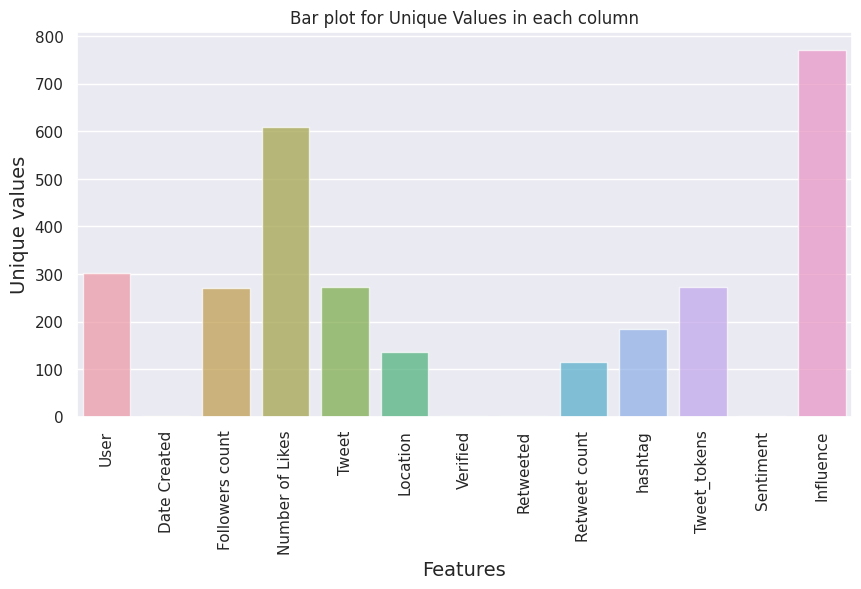

In [26]:
f, ax = plt.subplots(1,1, figsize=(10,5))

sns.barplot(x=unidf['Features'], y=unidf['Uniques'], alpha=0.7)
plt.title('Bar plot for Unique Values in each column')
plt.ylabel('Unique values', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [27]:
def extract_strings(s):
    regex = r"'(.*?)'"
    matches = re.findall(regex, s)
    return matches

In [28]:
l = reduce(lambda x, y: list(x)+list(y), zip(df['Tweet_tokens']))
flatten = [item for sublist in l for item in extract_strings(sublist)]
counts = Counter(flatten).most_common()
df2 = pd.DataFrame.from_records(counts, columns=['Phrase', 'Count'])
df2['Phrase']= df2['Phrase'].apply(lambda x: ' '.join([w for w in x]))

In [29]:
df2.head(10)

,Phrase,Count
0,c o v i d,7440
1,r u s s i a,6246
2,1 9,5952
3,w a r,2702
4,l,1872
5,w e s t e r n,1433
6,d e,1392
7,f o r m e r,1381
8,b l o c k e d,1342
9,g,1248


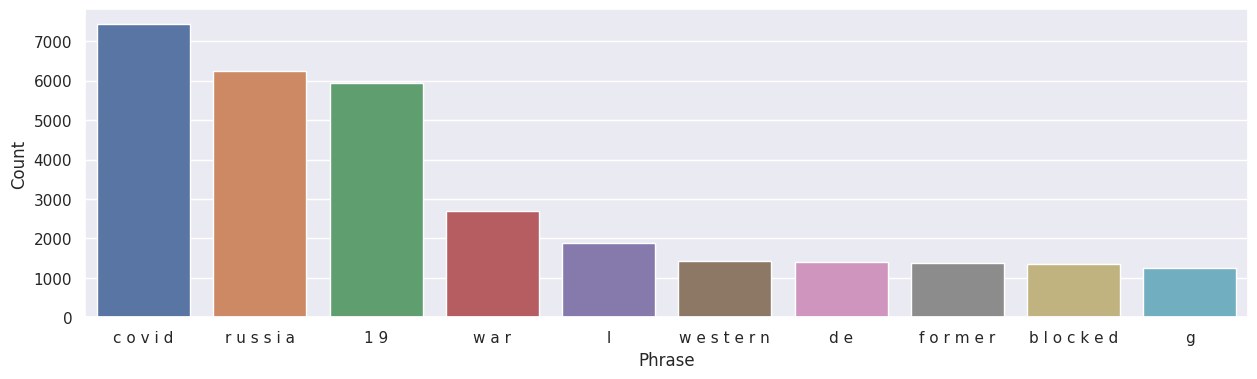

In [30]:
df2 = df2.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(15,4))
ax = sns.barplot(data=df2, x= "Phrase", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [31]:
l = reduce(lambda x, y: list(x)+list(y), zip(df['hashtag']))
flatten = [item for sublist in l for item in extract_strings(sublist)]
counts = Counter(flatten).most_common()
df2 = pd.DataFrame.from_records(counts, columns=['Phrase', 'Count'])
df2['Phrase']= df2['Phrase'].apply(lambda x: ' '.join([w for w in x]))

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


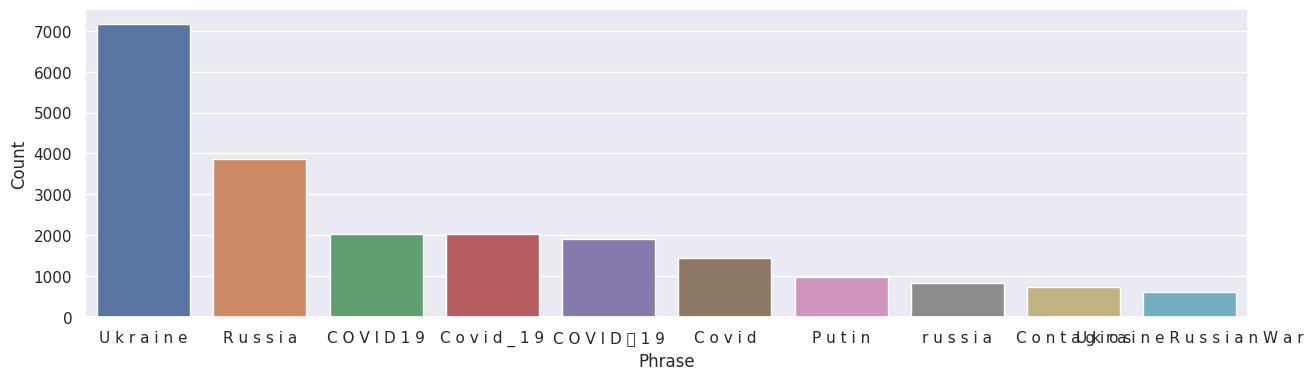

In [32]:
df2 = df2.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(15,4))
ax = sns.barplot(data=df2, x= "Phrase", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

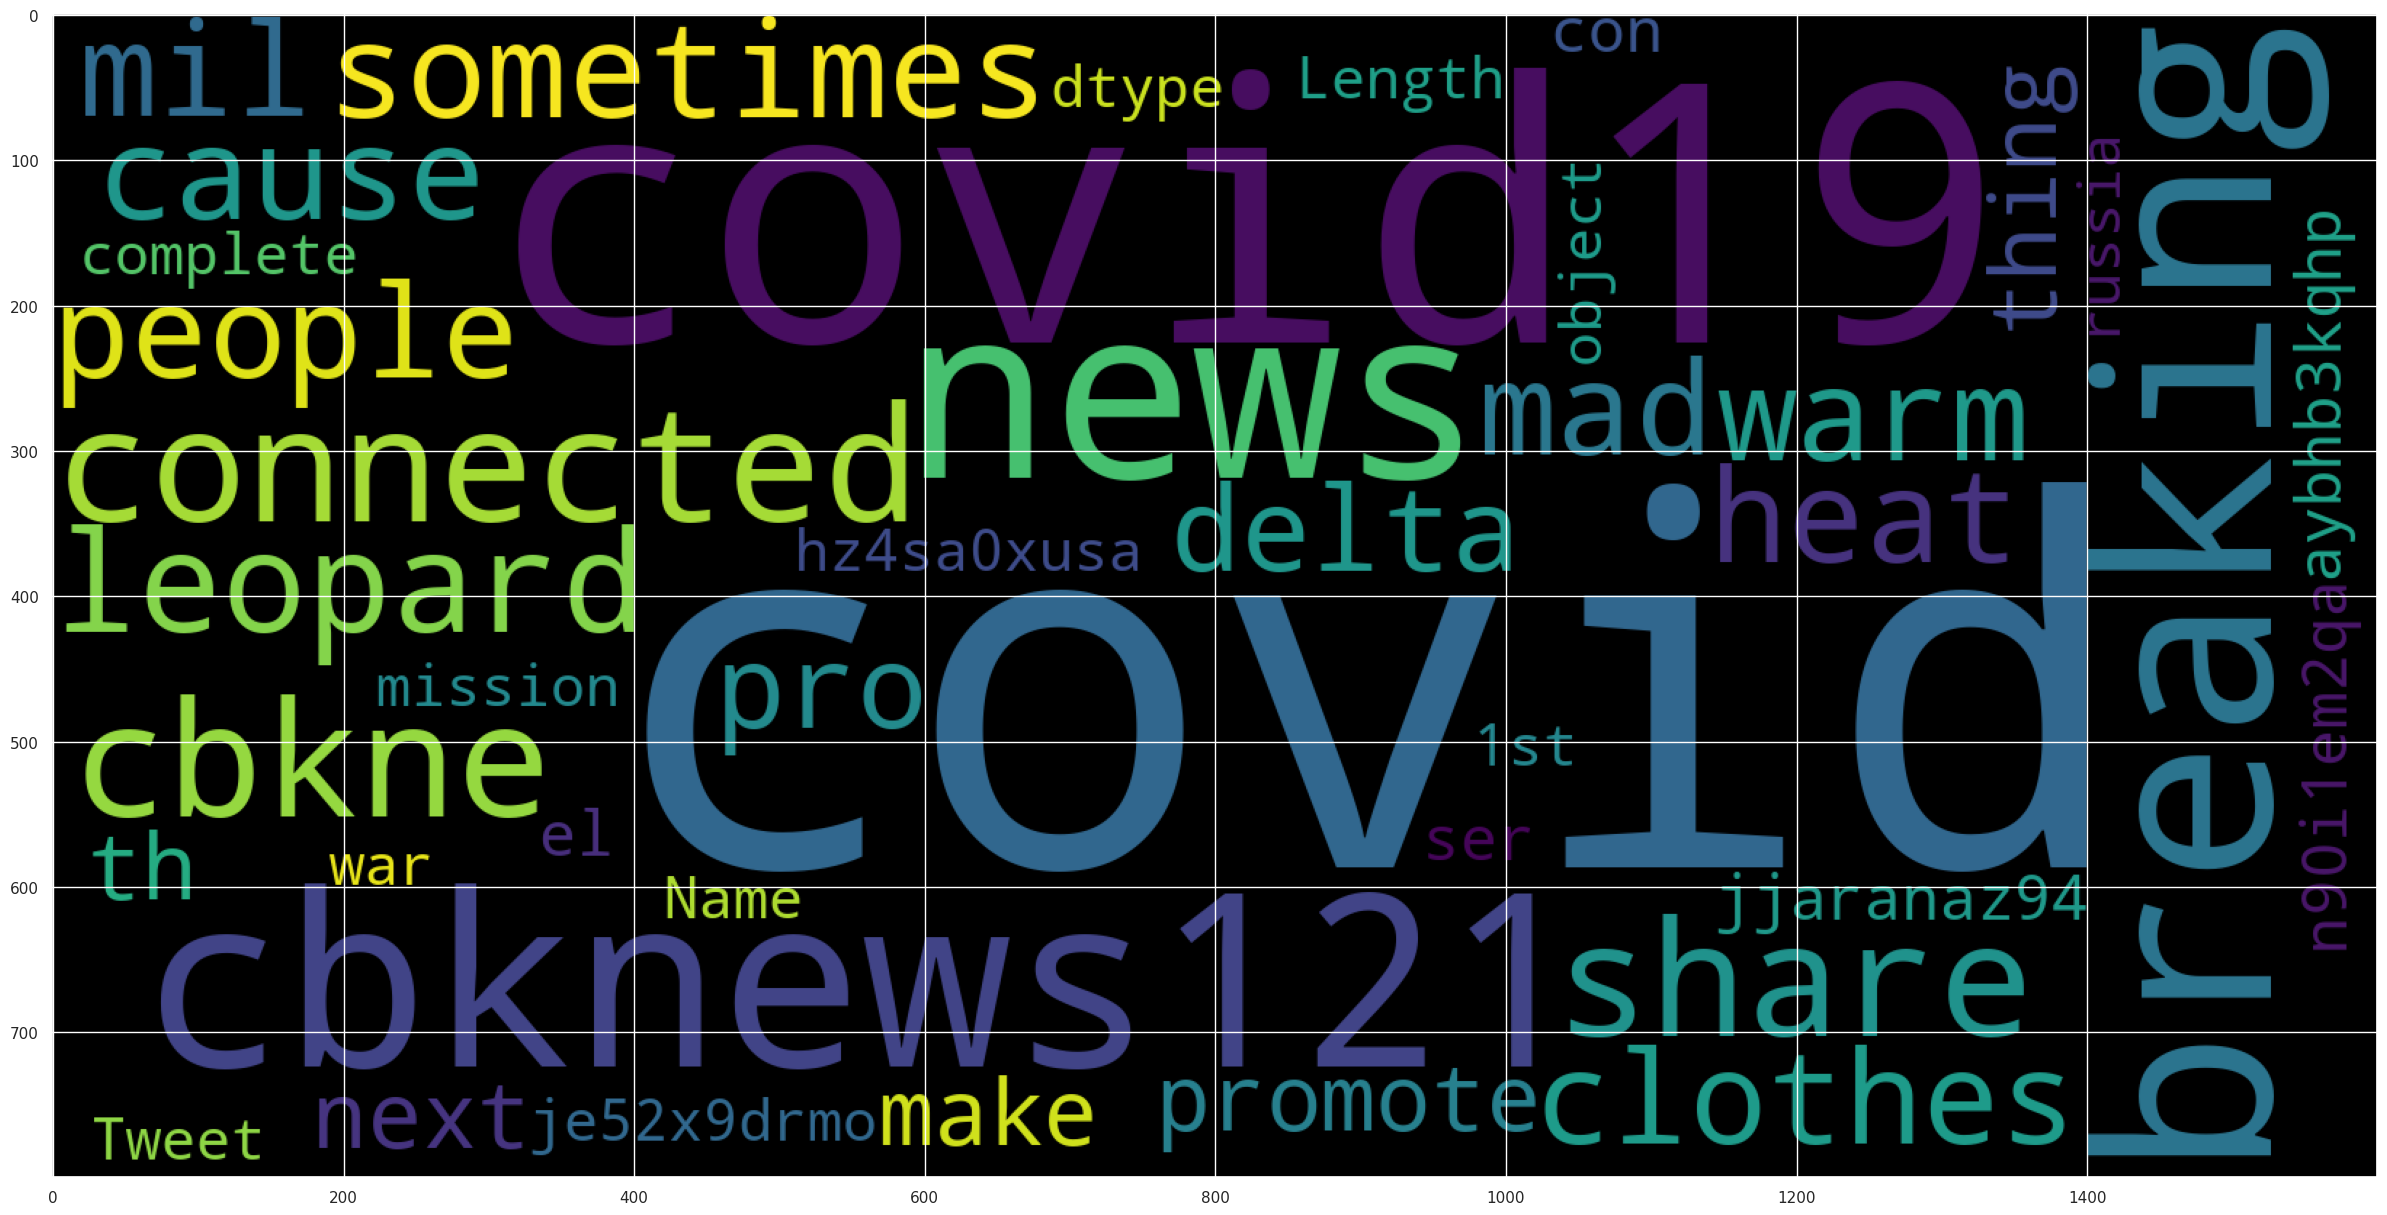

In [33]:
data = df['Tweet']
plt.figure(figsize = (30,30))
wc = WordCloud(max_words = 10000 , width = 1600 , height = 800, collocations=False).generate("".join(str(data)))
plt.imshow(wc)

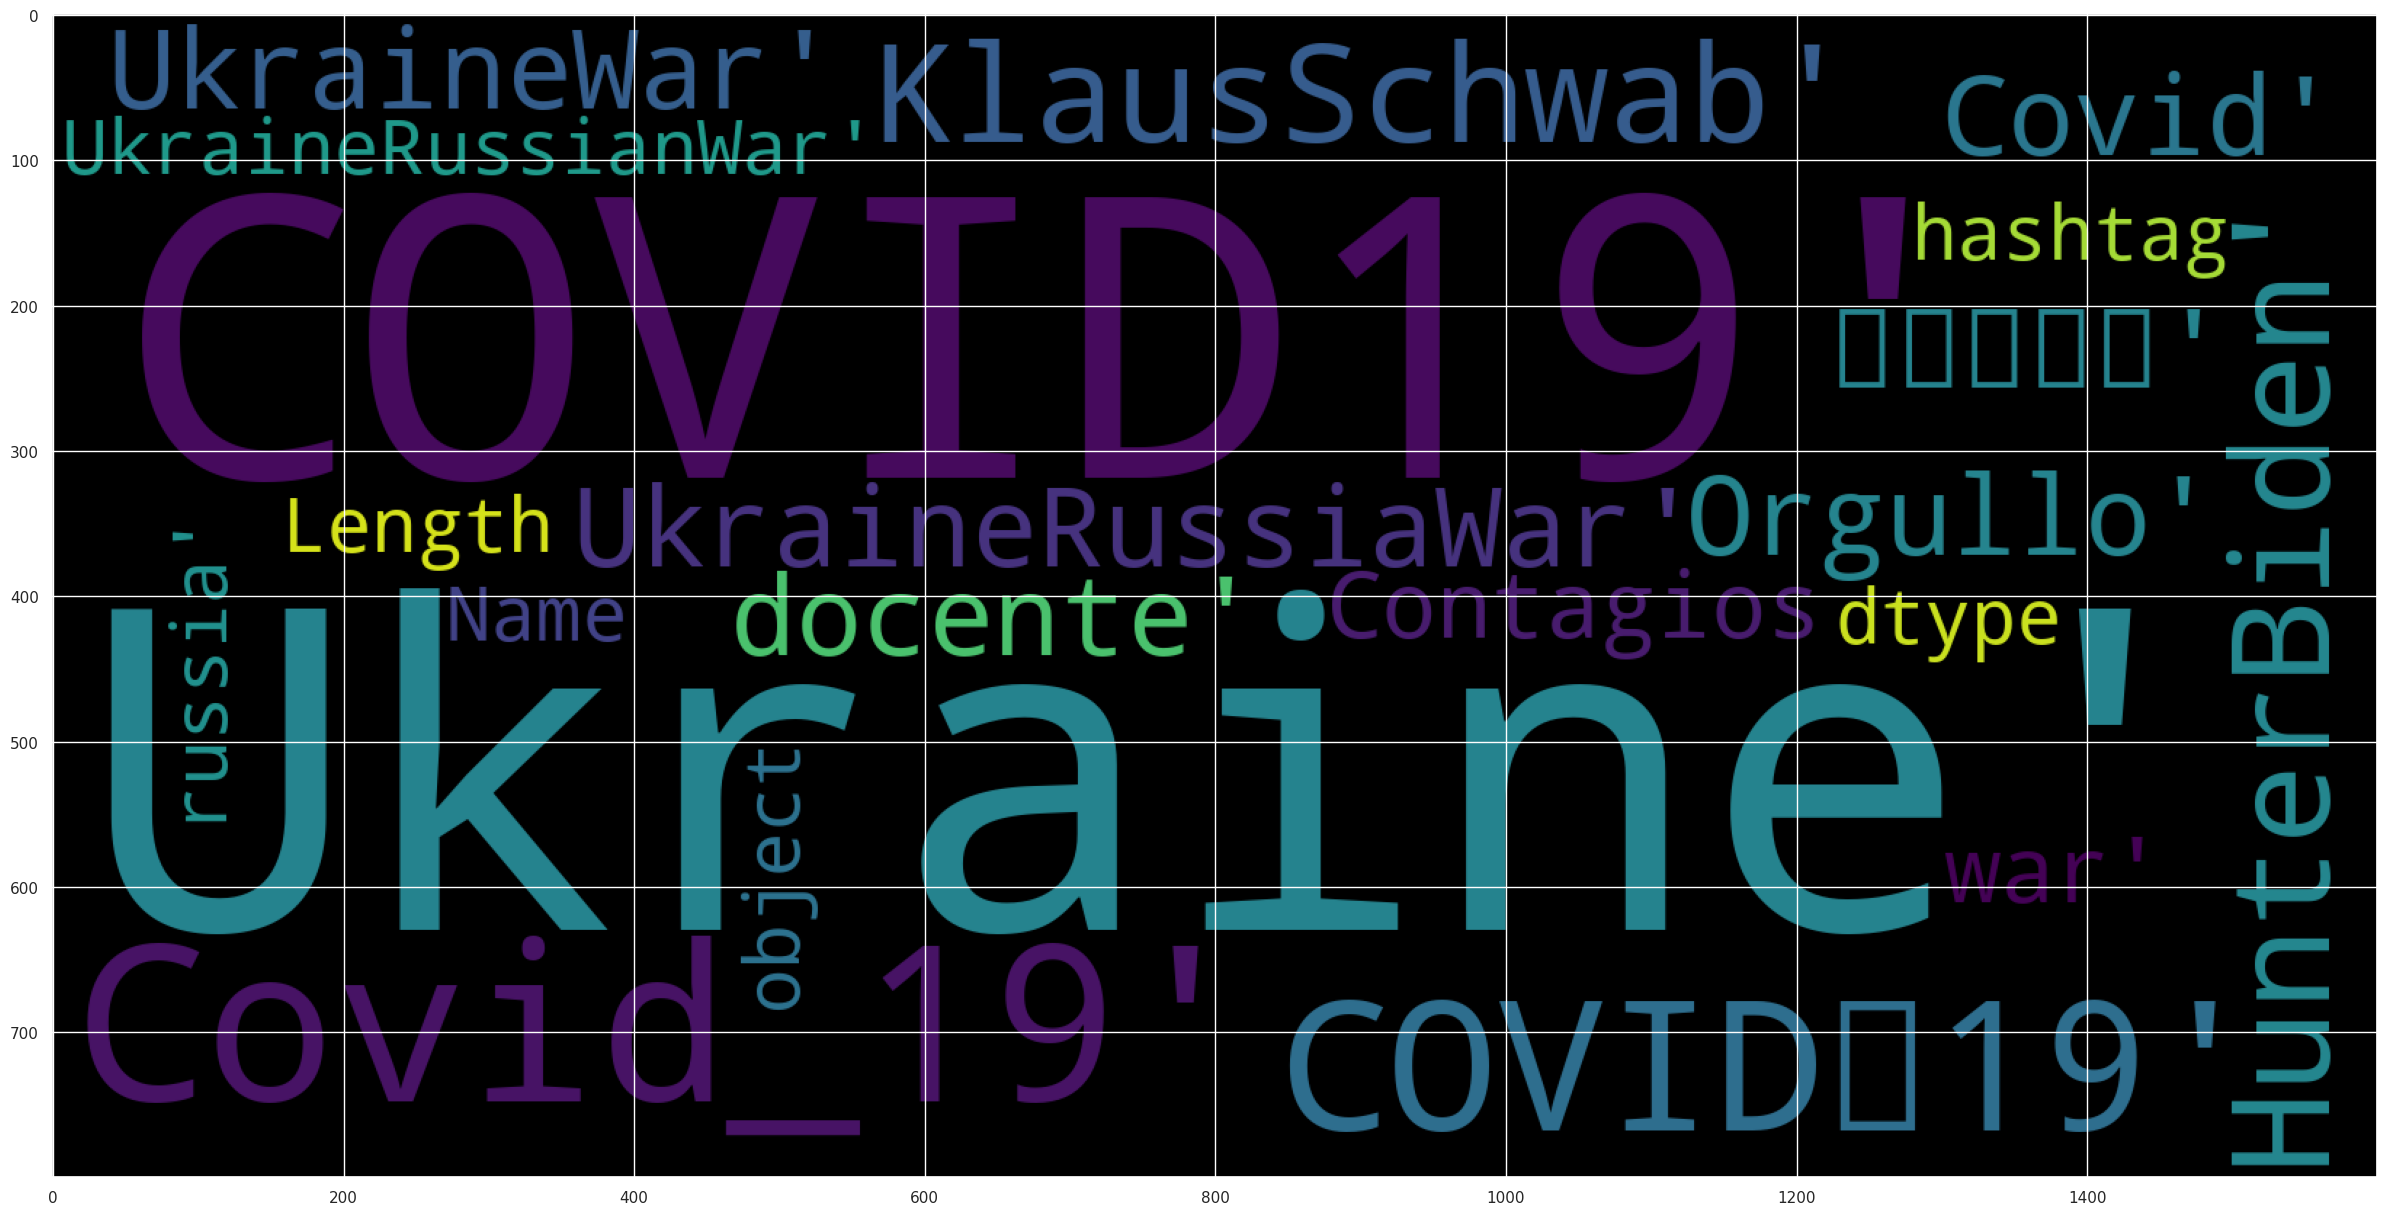

In [34]:
data = df['hashtag']
plt.figure(figsize = (30,30))
wc = WordCloud(max_words = 100000 , width = 1600 , height = 800, collocations=False).generate("".join(str(data)))
plt.imshow(wc)

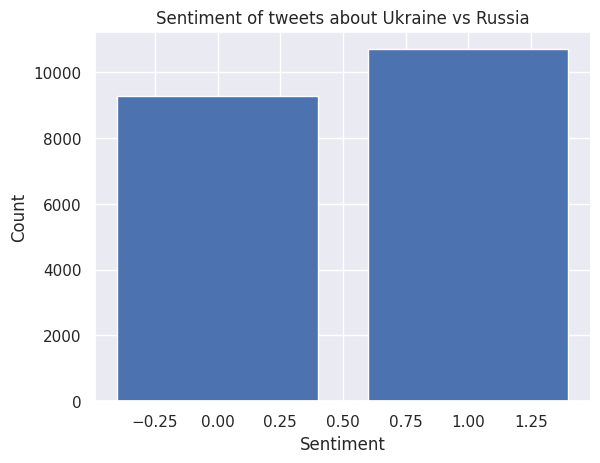

In [35]:
sentiment_counts = df['Sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Sentiment of tweets about Ukraine vs Russia')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [43]:
df_sorted = df.sort_values('Influence', ascending=False).drop_duplicates('User').head(10)[['User', 'Tweet']]


In [45]:
print(df_sorted)

                                                    User  \
13613                                    George Galloway   
6260                               Vote For Democrats 🇺🇸   
8839   #TheGlovemeister #KindnessWillAlwaysKeepUsToge...   
4499                                         🇺🇦 Paladine   
18700                                          TRANSform   
19502                                  Quotidiano Libero   
6002   Lallier Michel #JeSoutiensEmmanuelEtBrigitteMa...   
8726                                          Raiko Aasa   
9382                                 Middle East Monitor   
19122                                       Larry Tansey   

                                                   Tweet  
13613  leading opposition 2 2 war rally 25 hf8t2myx0t...  
6260     us u transportation command 60 part united 2 85  
8839                                                 NaN  
4499   orthodox oligarch guard dog dream oligarch kon...  
18700  kboz3 two 76 aircraft ministry emerge

Data Modelling

In [36]:
data=df[['Sentiment', 'Tweet']]

In [ ]:
X=data.Tweet
Y=data.Sentiment

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state =1)

In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=60000)
vectoriser.fit(X_train.values.astype('U'))
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  2085


In [ ]:
X_train = vectoriser.transform(X_train.values.astype('U'))
X_test  = vectoriser.transform(X_test.values.astype('U'))

In [ ]:
def model_Evaluate(model):
    Y_pred = model.predict(X_test)
    print(classification_report(Y_test, Y_pred))
    cf_matrix = confusion_matrix(Y_test, Y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.56      0.63      0.59      1830
           1       0.65      0.58      0.61      2170

    accuracy                           0.60      4000
   macro avg       0.60      0.60      0.60      4000
weighted avg       0.61      0.60      0.60      4000



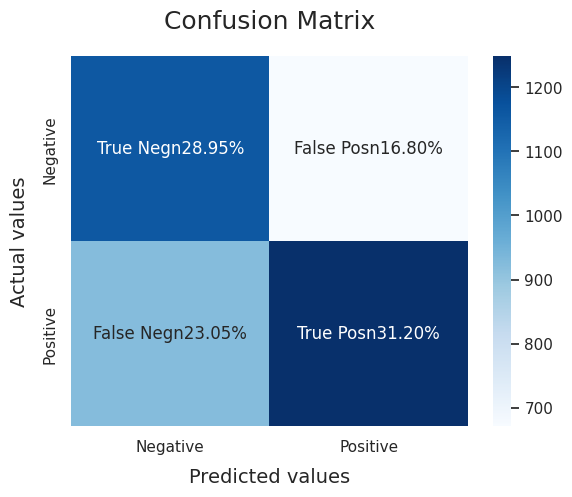

In [ ]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, Y_train)
model_Evaluate(LRmodel)
Y_pred = LRmodel.predict(X_test)

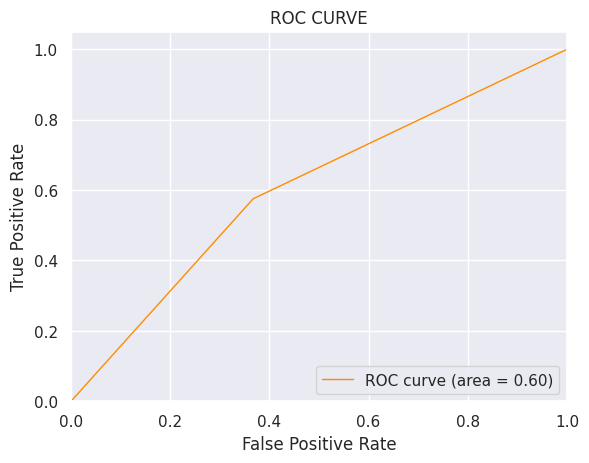

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()